In [4]:
import numpy as np
from math import sqrt
import matplotlib.pyplot as plt
import warnings
from matplotlib import style
from collections import Counter
style.use('fivethirtyeight')


In [5]:
# creating a dictionary, creating 2 classes of k and r
dataset = {'k':[[1,2],[2,3],[3,1]], 'r':[[6,5],[7,7],[8,6]]}

#we will now input and give this new unknown point its class, which will be either k or r
new_features = [5,7]

In [13]:
#defining our own main K Nearest Algo
def k_nearest_neighbors(data, predict, k=3):
    if len(data) >= k :
        warnings.warn('K is set to a value less than total voting groups! (YOU R DUMB ACTUALLY)' )
        
    distances = []
    for group in data:
        for features in data[group]:
#             euclidean_distance = sqrt( (features[0]-predict[0])**2 + (features[1]-predict[1])**2 )   
#             #BUT this is VERY SLOW calculation
#             #ALSO this formula is ONLY hard-coded for 2dimension-features, not more.......so we need to change it

            euclidean_distance = np.linalg.norm(np.array(features) - np.array(predict))
            #THIS function from numpy is MUCH faster and NOT hard-coded than the normal one.

            distances.append([euclidean_distance, group])
            #HERE we append to make a list of lists, each list containg distance and its group-number, so we can differentiate
            
    votes = [i[1] for i in sorted(distances)[:k]]        #can be written as a multi-line for loop, here we are getting the votes and storing them
    
    print (Counter(votes).most_common(1))
    vote_result = Counter(votes).most_common(1)[0][0]    #counting the votes of each class and finding the most valued class
    
    return vote_result

In [14]:
result = k_nearest_neighbors(dataset, new_features, k=3)
print (result)

[('r', 3)]
r


### ekhne ashlo j shobar voted class for new_feature is class 'r'. Also most number of votes is 3.

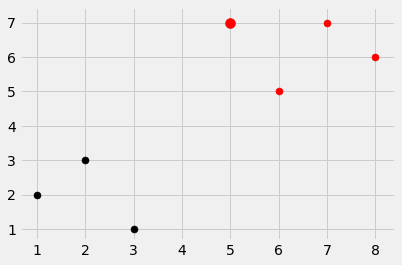

In [15]:
#we are now just showing all the features of both the classes
for i in dataset:
    for ii in dataset[i]:
        plt.scatter(ii[0],ii[1], s=50, color=i)
         
# [[plt.scatter(ii[0],ii[1], s=100, color=i) for ii in dataset[i]] for i in dataset]       # can be written in 1line also

plt.scatter(new_features[0], new_features[1], s=100, color=result)          #we just see the unknown feature also
plt.show()